# U.S. Medical Insurance Costs Analysis

This project involves the analysis of a provided CSV file containing data on medical insurance costs in the United States. Utilizing Python programming, I will explore and derive insights from the dataset. The objective is to gain a comprehensive understanding of the factors influencing medical insurance charges and to present the findings through a structured data analysis using Python.

In [2]:
# we will start by importing csv library
import csv
# importing matplotlib.pyplot will allow us to visualize the distributions
import matplotlib.pyplot as plt


### Dataset Exploration

Upon importing the necessary Python libraries, the dataset 'insurance.csv' is loaded for examination. This initial step involves acquainting ourselves with the dataset to understand its structure and content. By systematically reviewing the data, we lay the groundwork for subsequent analyses, ensuring a comprehensive understanding of the variables and their potential impact on medical insurance costs.

In [3]:
# file path is defined and stored in a variable
file_path = 'insurance.csv' 
# empty lists are created to store the relevant information from the dataset
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
insurance_cost = []

Following the initialization of various empty lists, the contents of the file are read, and each pertinent data point is appended to its respective list. This meticulous process ensures the accurate extraction and organization of information from the 'insurance.csv' dataset. Each list is designed to store specific attributes, facilitating a structured approach to data handling and subsequent analysis.

In [4]:
with open(file_path) as file:
    reader = csv.DictReader(file)
    for row in reader:
        age.append(int(row['age']))
        sex.append(row['sex'])
        bmi.append(float(row['bmi']))
        children.append(int(row['children']))
        smoker.append(row['smoker'])
        region.append(row['region'])
        insurance_cost.append(float(row['charges']))

### Exploratory Data Analysis

To gain initial insights into the dataset, the first five rows are displayed, showcasing key attributes such as age, gender, BMI, number of children, smoking status, region, and insurance cost. This initial snapshot provides a glimpse into the diversity of the dataset:

In [5]:
# Displaing the first few rows of the dataset to get an idea of what it looks like
for i in range(5):
    print(f"Age: {age[i]}, Sex: {sex[i]}, BMI: {bmi[i]}, Children: {children[i]}, Smoker: {smoker[i]}, Region: {region[i]}, Charges: {insurance_cost[i]}")

Age: 19, Sex: female, BMI: 27.9, Children: 0, Smoker: yes, Region: southwest, Charges: 16884.924
Age: 18, Sex: male, BMI: 33.77, Children: 1, Smoker: no, Region: southeast, Charges: 1725.5523
Age: 28, Sex: male, BMI: 33.0, Children: 3, Smoker: no, Region: southeast, Charges: 4449.462
Age: 33, Sex: male, BMI: 22.705, Children: 0, Smoker: no, Region: northwest, Charges: 21984.47061
Age: 32, Sex: male, BMI: 28.88, Children: 0, Smoker: no, Region: northwest, Charges: 3866.8552


Following this, the average insurance cost is calculated as a central measure of the dataset's distribution:

In [6]:
# Calculating the average insurance cost
average_cost = sum(insurance_cost) / len(insurance_cost)
print(f"The average insurance cost is: {average_cost}")

The average insurance cost is: 13270.422265141257


The subsequent histogram displays the distribution of ages within the dataset:

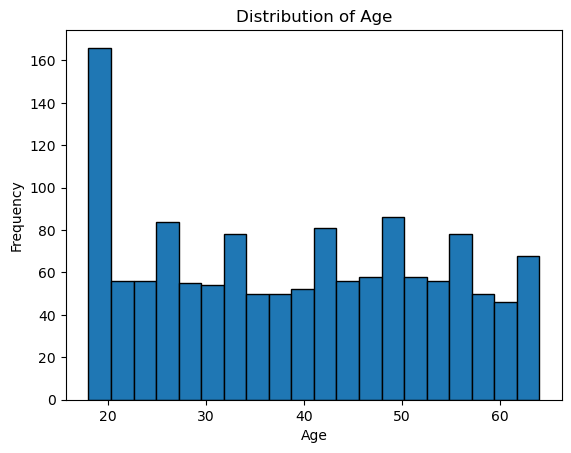

In [7]:
# Distribution of Age
plt.hist(age, bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram reveals a concentration of ages in the late teens to the early twenties. To explore the relationship between age and BMI, further analysis and visualization are necessary, as shown in the subsequent comments.

### Exploring Age and BMI Relationship

To investigate the relationship between age and BMI, a scatter plot is generated, displaying age on the x-axis and BMI on the y-axis:

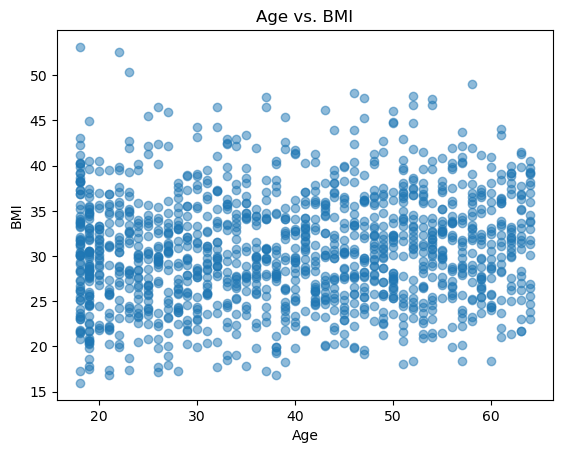

In [15]:
# Scatter plot
plt.scatter(age, bmi,alpha=0.5)
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

The resulting scatter plot indicates a relatively even distribution of BMI across different age groups. The concentration of data points in the middle of the graph suggests that, on average, individuals exhibit a BMI between approximately 20 and 40, irrespective of age. This observation implies that there is no directly proportional relationship between age and BMI.

Having explored the age and BMI dynamics, the next analysis delves into understanding how smoking status affects insurance costs.

### Analyzing the Impact of Smoking on Insurance Costs

To understand the impact of smoking on insurance costs, the first step involves calculating the average insurance costs for smokers and non-smokers:

In [9]:
# first we need to calculate the average costs for a smoker and a non-smoker.
average_cost_smoker = sum([insurance_cost for smoke, insurance_cost in zip(smoker, insurance_cost) if smoke == 'yes']) / smoker.count('yes')
average_cost_non_smoker = sum([insurance_cost for smoke, insurance_cost in zip(smoker, insurance_cost) if smoke == 'no']) / smoker.count('no')

print(f'Average Insurance Cost for Smokers: {average_cost_smoker}')
print(f'Average Insurance Cost for Non-Smokers: {average_cost_non_smoker}')


Average Insurance Cost for Smokers: 32050.23183153285
Average Insurance Cost for Non-Smokers: 8434.268297856199


Subsequently, a bar plot is created to visually compare the average insurance costs for smokers and non-smokers:

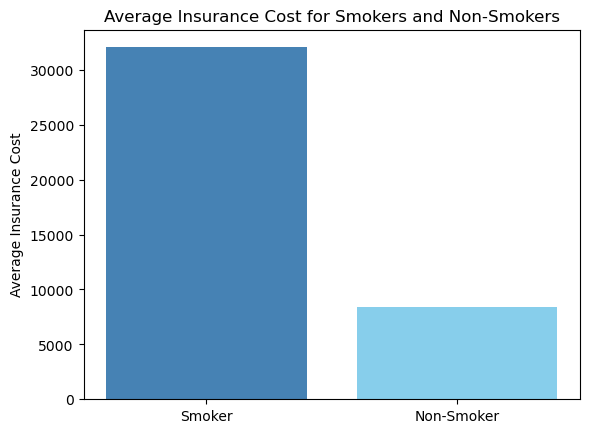

In [26]:
# Next, we will create a bar plot to map the difference between them

labels = ['Smoker', 'Non-Smoker']
average_cost = [average_cost_smoker, average_cost_non_smoker]

plt.bar(labels, average_cost, color=['steelblue', 'skyblue'])
plt.title('Average Insurance Cost for Smokers and Non-Smokers')
plt.ylabel('Average Insurance Cost')
plt.show()

The bar plot vividly illustrates the substantial difference between the insurance costs for smokers and non-smokers.

Continuing the analysis, the ratio of average costs for smokers to non-smokers is calculated:

In [12]:
# Calculate the ratio of average costs for smokers to non-smokers
cost_ratio = average_cost_smoker / average_cost_non_smoker

print(f"The average insurance cost for smokers is approximately {cost_ratio:.2f} times more than for non-smokers.")


The average insurance cost for smokers is approximately 3.80 times more than for non-smokers.


The computed ratio of approximately 3.80 emphasizes the significant impact of smoking on insurance costs. This substantial difference underscores the financial implications associated with smoking.

Furthermore, the analysis shifts focus to understanding the influence of the number of children on insurance costs through the exploration of a scatter plot:

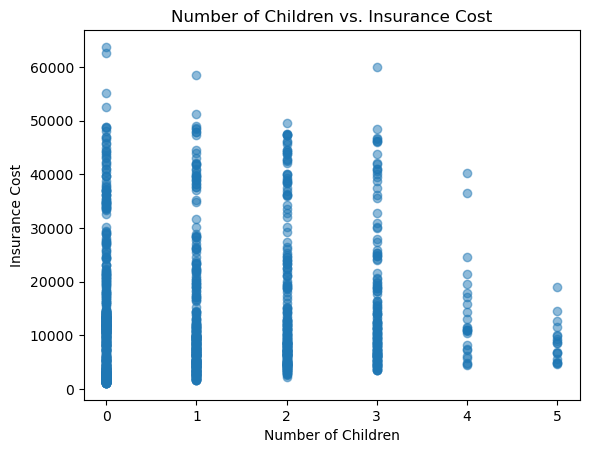

In [13]:
# Scatter plot of Number of Children vs. Insurance Cost
plt.scatter(children, insurance_cost, alpha=0.5)
plt.title('Number of Children vs. Insurance Cost')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Cost')
plt.show()


The scatter plot reveals intriguing results, indicating higher insurance costs for individuals without children compared to those with children. Moreover, there appears to be a sudden decrease in insurance costs, especially after the third child.

To delve deeper into this phenomenon, the subsequent step involves calculating the average insurance cost by the number of children and presenting the findings through a bar graph.

### Exploring the Relationship Between Number of Children, BMI, and Insurance Costs

To comprehensively understand the influence of the number of children on insurance costs, an analysis is conducted by calculating the average insurance cost for each distinct number of children:

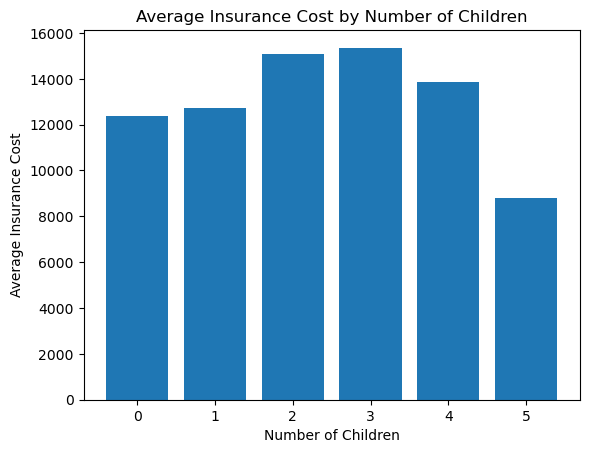

In [17]:
# Calculating average insurance cost for each number of children
average_cost_by_children = {}

for num_children in set(children):
    indices = [i for i, child in enumerate(children) if child == num_children]
    average_cost = sum(insurance_cost[i] for i in indices) / len(indices)
    average_cost_by_children[num_children] = average_cost

# Creating a bar plot for average cost by number of children
plt.bar(average_cost_by_children.keys(), average_cost_by_children.values())
plt.title('Average Insurance Cost by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Insurance Cost')
plt.show()


The resulting bar plot unveils a nuanced relationship between the number of children and insurance costs. While the general trend indicates an increase in insurance costs with the number of children, an intriguing outlier is observed for individuals with 5 children, showcasing a noteworthy decrease in insurance costs.

This unexpected result challenges the initial assumption of a linear relationship and presents a bell-shaped curve, warranting further investigation into the dynamics of insurance costs based on family size.

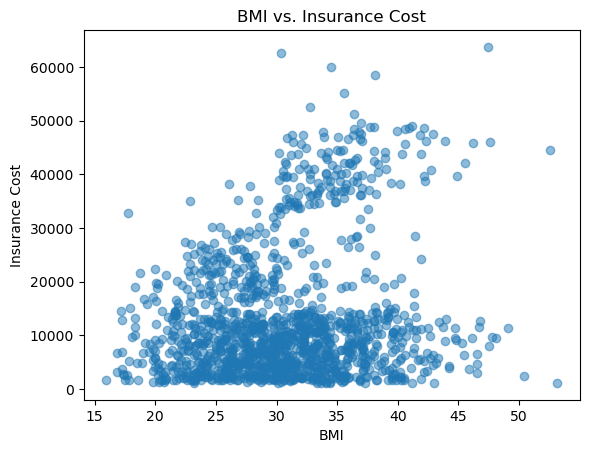

In [24]:
# Scatter plot diagram to represent BMIs and thier Insurance costs
plt.scatter(bmi, insurance_cost, alpha=0.5)
plt.title('BMI vs. Insurance Cost')
plt.xlabel('BMI')
plt.ylabel('Insurance Cost')
plt.show()


The scatter plot illuminates distinct patterns within the dataset. Notably, BMIs below 30 generally correspond to insurance costs below 40,000, while BMIs exceeding 30 exhibit the highest insurance costs. The concentration of values between 25 and 35 BMI, predominantly below the 20,000 insurance cost mark, underscores the significance of BMI in influencing insurance costs.

This multifaceted analysis offers valuable insights into the intricate relationships between the number of children, BMI, and insurance costs, challenging initial assumptions and paving the way for further exploration and understanding.